## **Multiple Linear Regression: Predicting House Prices**

**Objective:**

Your task is to build a **Multiple Linear Regression** model to predict the price of a house based on various features such as its area, the number of bedrooms, and other amenities. This homework will enhance your understanding of how to handle multiple features in regression and how to evaluate a model's performance.

**Dataset:**

You are provided a dataset with the following columns:
1. **price**: The price of the house (target variable).
2. **area**: The area of the house in square feet.
3. **bedrooms**: The number of bedrooms.
4. **bathrooms**: The number of bathrooms.
5. **stories**: The number of stories the house has.
6. **mainroad**: Whether the house is on a main road (yes/no).
7. **guestroom**: Whether the house has a guestroom (yes/no).
8. **basement**: Whether the house has a basement (yes/no).
9. **hotwaterheating**: Whether the house has hot water heating (yes/no).
10. **airconditioning**: Whether the house has air conditioning (yes/no).
11. **parking**: The number of parking spaces.
12. **prefarea**: Whether the house is in a preferred area (yes/no).
13. **furnishingstatus**: The furnishing status of the house (furnished, semi-furnished, unfurnished).


Steps to Complete:

### **1. Data Loading and Preprocessing**
1. **Load the dataset**:
   - Read the dataset using `pandas`.
   - Display the first few rows to understand the structure.

2. **Handle categorical variables**:
   - Convert binary categorical variables (e.g., `mainroad`, `guestroom`, etc.) to numerical values (1 for "yes" and 0 for "no").
   - For multi-class categorical variables like `furnishingstatus`, use one-hot encoding or dummy variables.

3. **Check for missing values**:
   - Handle missing values by either imputing (e.g., mean or median) or dropping rows/columns as appropriate.

4. **Feature scaling**:
   - Scale numerical features like `area`, `price`, and `parking` to ensure all variables are on a similar scale.

### **2. Build the Multiple Linear Regression Model**
1. **Split the dataset**:
   - Divide the dataset into training (80%) and testing (20%) subsets.

2. **Model implementation**:
   - Use **Scikit-learn** to fit a Multiple Linear Regression model:
     ```python
     from sklearn.linear_model import LinearRegression
     ```
   - Fit the model using training data and extract the coefficients for each feature.

3. **Optional: Manual Implementation**:
   - Use the **Normal Equation** for manual implementation:
    $$
    \beta = (X^T X)^{-1} X^T y
    $$

### **3. Model Evaluation**
1. **Predictions**:
   - Use the model to predict the house prices on the test dataset.

2. **Evaluation Metrics**:
   - Calculate performance metrics:
     - **Mean Absolute Error (MAE)**
     - **Mean Squared Error (MSE)**
     - **R² Score**

3. **Interpretation**:
   - Discuss the significance of coefficients. For example, how much does the price increase for each additional square foot of area or for houses in preferred areas?

### **4. Visualization**
1. **Correlation Matrix**:
   - Plot a heatmap to show the correlation between features and the target variable.

2. **Predictions vs. Actuals**:
   - Create a scatter plot comparing predicted prices with actual prices.

### **5. Predictions**
1. Use the model to predict the price of a house with the following features:
   - **area**: 2400 sq. ft.
   - **bedrooms**: 4
   - **bathrooms**: 3
   - **stories**: 2
   - **mainroad**: yes
   - **guestroom**: no
   - **basement**: yes
   - **hotwaterheating**: no
   - **airconditioning**: yes
   - **parking**: 2
   - **prefarea**: yes
   - **furnishingstatus**: semi-furnished

**Deliverables:**

1. A Python script or Jupyter Notebook containing:
   - Data preprocessing and feature engineering.
   - Implementation of Multiple Linear Regression.
   - Model evaluation and interpretation.
   - Visualizations of correlations and predictions.
2. A brief report discussing:
   - The impact of different features on house prices.
   - Limitations of the model (e.g., assumptions of linearity or multicollinearity issues).

In [1]:
import pandas as pd

df = pd.read_csv("data/housing.csv")

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

df[binary_vars] = df[binary_vars].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [4]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True).astype(int)

In [6]:
print(df.isnull().sum())

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[scaled_features] = scaler.fit_transform(df[scaled_features])

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

# Coefficients
coefficients = pd.Series(l_reg.coef_, index=X.columns)
print('Intercept:', l_reg.intercept_)
print('Coefficients:')
print(coefficients)


Intercept: 4002422.1604061155
Coefficients:
area                               511615.563777
bedrooms                            56615.572458
bathrooms                          549420.501241
stories                            353158.429856
mainroad                           367919.947680
guestroom                          231610.037176
basement                           390251.176181
hotwaterheating                    684649.885339
airconditioning                    791426.735843
parking                            193542.781675
prefarea                           629890.565313
furnishingstatus_semi-furnished   -126881.817585
furnishingstatus_unfurnished      -413645.062228
dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = l_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 970043.4039201641
MSE: 1754318687330.6682
R² Score: 0.6529242642153175


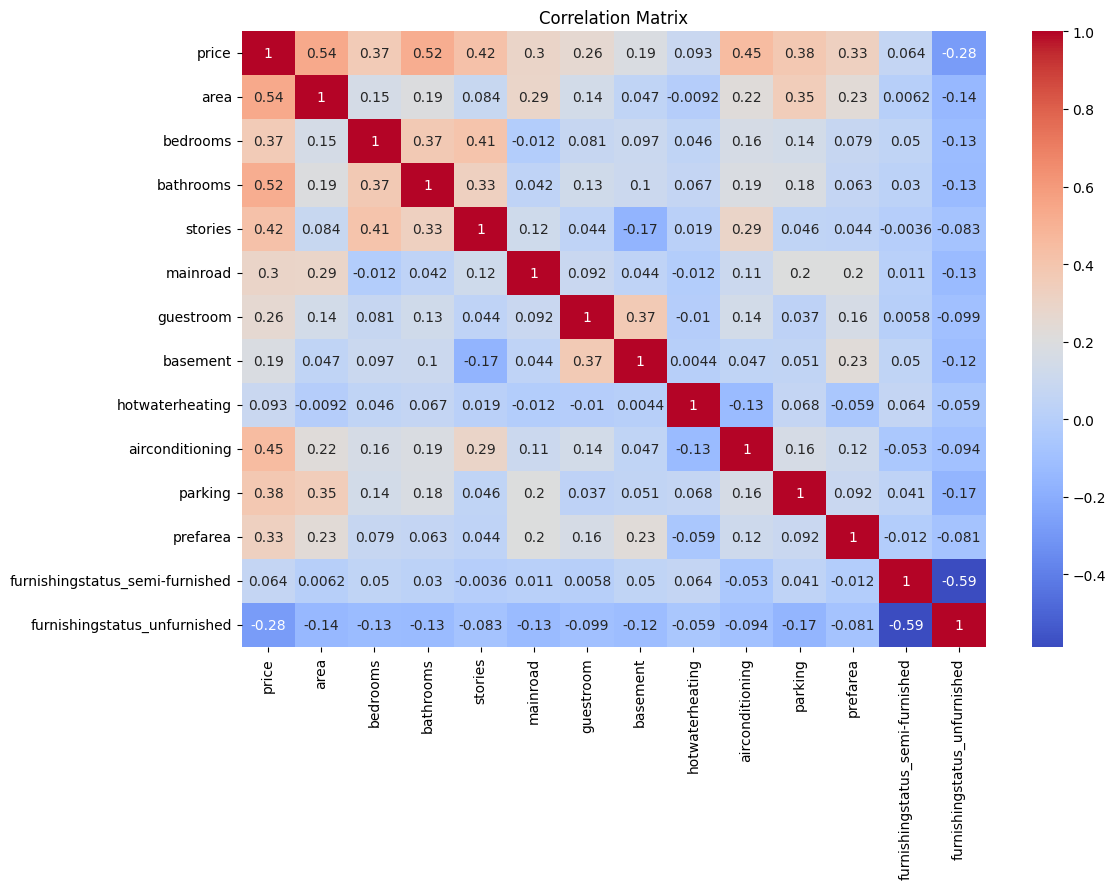

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


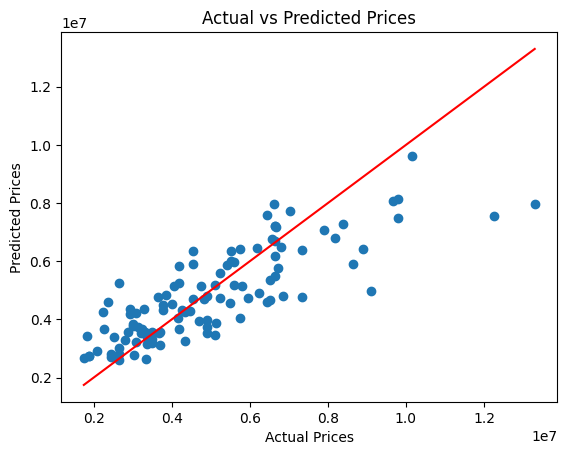

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line of equality
plt.show()


In [20]:
input_data = {
    'area': 2400,
    'bedrooms': 4,
    'bathrooms': 3,
    'stories': 2,
    'mainroad': 1,
    'guestroom': 0,
    'basement': 1,
    'hotwaterheating': 0,
    'airconditioning': 1,
    'parking': 2,
    'prefarea': 1,
    'furnishingstatus_semi-furnished': 1,
    'furnishingstatus_unfurnished': 0
}

input_df = pd.DataFrame([input_data])

input_df[scaled_features] = scaler.transform(input_df[scaled_features])

pred = l_reg.predict(input_df)

print("Predicted House Price:", pred[0])

Predicted House Price: 7734050.277301254


In [22]:
import joblib 

joblib.dump(l_reg, 'models/linear_regression_model.joblib')

['models/linear_regression_model.joblib']